# <span style="color:#2462C0">**Pandas**</span>
***pandas*** is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

#### Difference between loc and iloc:
* loc: select data by row
* iloc: select data by index

### <span style="color:#2462C0">Import libraries</span>

In [1]:
import pandas as pd
import os

os.chdir('C:\\Users\\Matheus\\Documents\\GitHub\\Data-Science-Micromasters\\Python for Data Science\\Week 4 - Pandas')

## <span style="color:#2462C0">Introduction to pandas data structures</span>
pandas has two main data structures it uses, namely, ***Series*** and ***DataFromes***
* DataFrames store heterogeneous data types

## <span style="color:#2462C0">pandas Series</span>
One-dimensional labeled array

In [2]:
ser = pd.Series(data = [100,True,300,"foo",500],
                index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom       100
bob      True
nancy     300
dan       foo
eric      500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser[['nancy','bob']]

nancy     300
bob      True
dtype: object

In [6]:
ser[[4,3,1]]

eric     500
dan      foo
bob     True
dtype: object

In [7]:
ser.iloc[2]

300

In [8]:
'bob' in ser

True

In [9]:
ser

tom       100
bob      True
nancy     300
dan       foo
eric      500
dtype: object

In [10]:
ser * 2

tom         200
bob           2
nancy       600
dan      foofoo
eric       1000
dtype: object

In [11]:
ser[['tom','nancy','eric']] ** 2

tom       10000
nancy     90000
eric     250000
dtype: object

## <span style="color:#2462C0">pandas DataFrame</span>
2-dimensional labeled data structure
### <span style="color:#2462C0">Create a DataFrame from dictionary of Python Series</span>

In [12]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d,index=['apple','ball','clock'])

,one,two
apple,100.0,111.0
ball,200.0,222.0
clock,300.0,NaN


In [17]:
pd.DataFrame(d,index=['dancy','ball','apple'],columns=['two','five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


### <span style="color:#2462C0">Create DataFrame from list of Python dictionaries</span>

In [18]:
data = [{'alex':1,'joe':2},{'ema':5,'dora':10,'alice':20}]

In [19]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [20]:
pd.DataFrame(data,index=['orange','red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [21]:
pd.DataFrame(data,columns=['joe','dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


### <span style="color:#2462C0">Basic DataFrame operations</span>

In [22]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [25]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [26]:
three = df.pop('three')
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [27]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [28]:
del df['two']

In [29]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [30]:
df.insert(2,'copy_of_one',df['one']) # 2 is the position where the new column will be
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [31]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


# <span style="color:#2462C0">Case Study: Movie Data Analysis</span>
This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## <span style="color:#2462C0">Download the Dataset</span>
Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

## <span style="color:#2462C0">Use Pandas to Read the Dataset</span>

In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the ***read_csv*** function in pandas, we will ingest these three files.

In [32]:
movies = pd.read_csv('Files/movielens/movies.csv',sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
# timestamps represent seconds since midnight coordinated universal time (UTC)
tags = pd.read_csv('Files/movielens/tags.csv',sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [34]:
ratings = pd.read_csv('Files/movielens/ratings.csv',sep=',',parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [35]:
# removing timestamps
del ratings['timestamp']
del tags['timestamp']

## <span style="color:#2462C0">Data Structures</span>
### <span style="color:#2462C0">Series</span>

In [36]:
# extract 0th row

row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [37]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [38]:
row_0['userId']

18

In [39]:
'rating' in row_0

False

In [40]:
row_0.name

0

In [41]:
row_0 = row_0.rename('first_row')
row_0.name     # becames the index

'first_row'

### <span style="color:#2462C0">DataFrames</span>

In [42]:
tags = pd.read_csv('Files/movielens/tags.csv',sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [43]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [44]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [45]:
# extract row 0, 11 and 2000 from DataFrame
tags.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


## <span style="color:#2462C0">Descriptive Statistics</span>

In [46]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [47]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [48]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [49]:
ratings['rating'].mean()

3.5255285642993797

In [50]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [51]:
ratings['rating'].min()

0.5

In [52]:
ratings['rating'].max()

5.0

In [53]:
ratings['rating'].std()

1.051988919275684

In [54]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [55]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [56]:
filter_1 = ratings['rating'] > 5
print(type(filter_1))
print('-'*35)
print(filter_1.any())
print('-'*35)
print(filter_1)

<class 'pandas.core.series.Series'>
-----------------------------------
False
-----------------------------------
0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
2000

In [57]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

## <span style="color:#2462C0">Data Cleaning: Handling Missing Data</span>

### <span style="color:#2462C0">We see that real world data is messy.</span>
* Missing values
* Outliers
* Invalid data (e.g. negative values for age)
* NaN value (np.nan)
* None value

### <span style="color:#2462C0">Handling Data Quality Issues</span>
* Replace the value
* Fill gaps forward/backward
* Drop fields
* Interpolation

In [58]:
movies.shape

(27278, 3)

In [59]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [60]:
ratings.shape

(20000263, 3)

In [61]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [62]:
tags.shape

(465564, 4)

In [63]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [64]:
sum(tags['tag'].isnull())

16

In [65]:
tags = tags.dropna()
print("Dropped lines with NULL values")

Dropped lines with NULL values


In [66]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [67]:
tags.shape

(465548, 4)

The number of lines have reduced

## <span style="color:#2462C0">Data Visualization</span>
Explore here: http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting

### <span style="color:#2462C0">Importing libraries</span>

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

### <span style="color:#2462C0">Plotting a Histogram for Rating</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016781B79FD0>]],
      dtype=object)

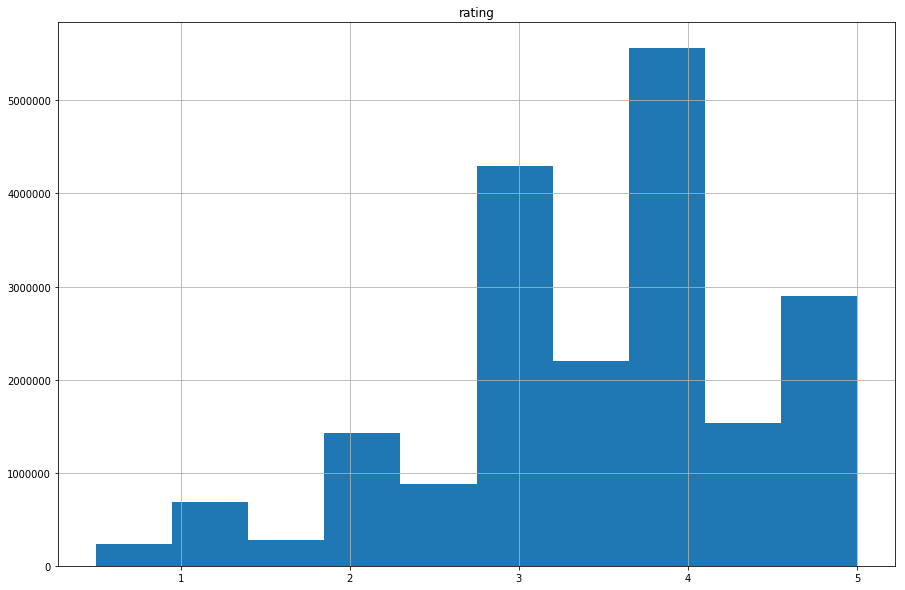

In [69]:
ratings.hist(column='rating',figsize=(15,10))

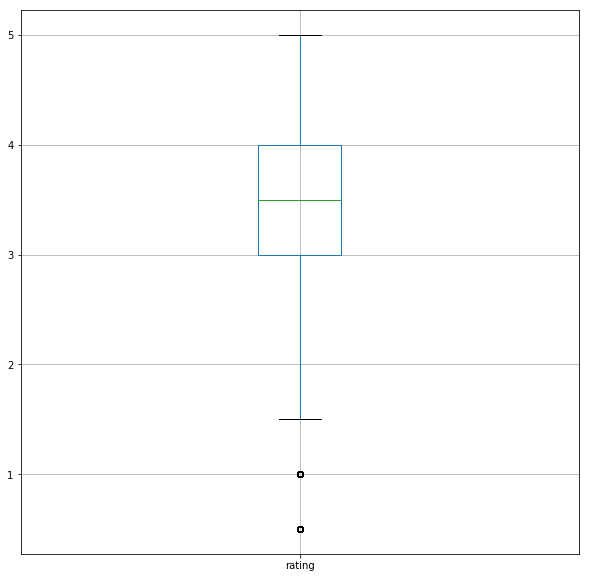

In [70]:
ratings.boxplot(column='rating',figsize=(10,10))

### <span style="color:#2462C0">Slicing Out Columns</span>

In [71]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [72]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [73]:
# last 10
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [74]:
# first 10
ratings[:10]

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [75]:
# from 1000 to 1009
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [76]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

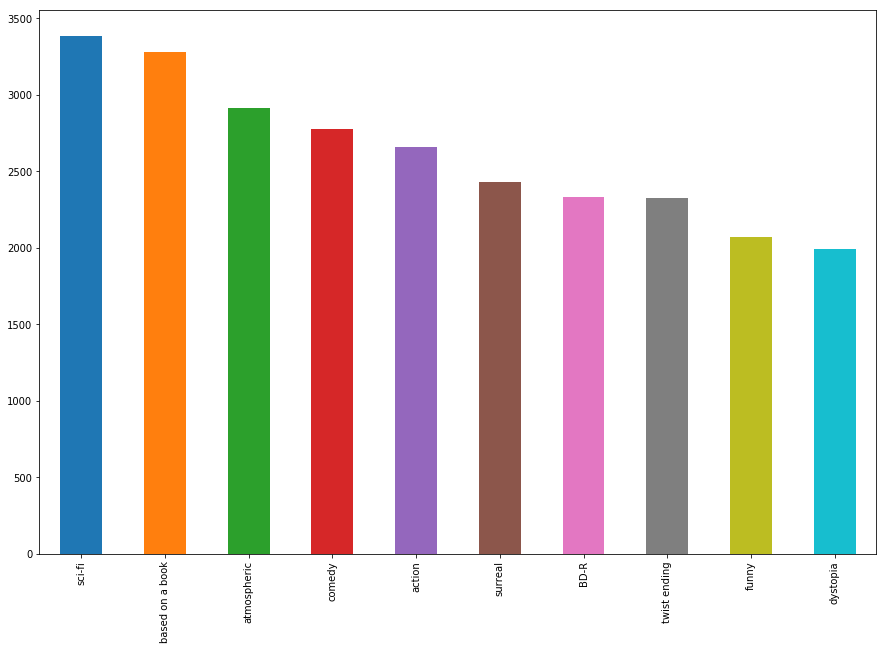

In [77]:
tag_counts[:10].plot(kind='bar',figsize=(15,10))

### <span style="color:#2462C0">Filters for Selecting Rows</span>

In [78]:
is_highly_rated = ratings['rating']>=4.0
ratings[is_highly_rated][:10]

,userId,movieId,rating
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0
10,1,293,4.0
11,1,296,4.0
12,1,318,4.0
15,1,541,4.0
22,1,1036,4.0
23,1,1079,4.0


In [79]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


### <span style="color:#2462C0">Group By and Aggregate</span>

In [80]:
rating_count = ratings[['movieId','rating']].groupby('rating').count()
rating_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [81]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
#average_rating.sort_values(by='rating')[:10]
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [82]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [83]:
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1
